## Аналитический отчет для SMM-отдела компании Skillbox

Задача – подготовить аналитический ответ для SMM-отдела компании Skillbox. <br> Объектом анализа является  [паблик Skillbox Вконтакте](https://vk.com/skillbox_education). <br> <br>
Необходимо подключиться к  API VK и выгрузите посты со стены паблика Skillbox за интересующий период. Проанализировать влияние времени публикации на вовлеченность пользователей (количество лайков, комментариев, голосов в опросах). Сделать аналитику по рубрикам, которые есть в паблике. Выбрать нужные посты можно с помощью регулярных выражений. Составить перечень рекомандаций для SMM-отдела по итогам анализа. <br> <br>

In [ ]:
# Импорт необходимых библиотек:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import calendar
import matplotlib.pyplot as plt

plt.style.use('seaborn')
from datetime import datetime, timedelta

<ipython-input-296-a5d37e33c9d1>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [ ]:
# функция для отправки JSON-запросов к API VK
def getjson(url, token, version, domain, offset):
    response = requests.get(url, params={'access_token': token, 'v': version, 'domain': domain, 'offset': offset})
    dict_posts = response.json()['response']['items']
    return dict_posts

In [ ]:
url = 'https://api.vk.com/method/wall.get'
token = 'dd32776fdd32776fdd32776fcede263d81ddd32dd32776fb94478a38c0d15d0040d98b'
domain = 'skillbox_education'
version = 5.131
offset = 0

post_list = []
# запросим первые 1700 постов со стены сообщества в ВК
for _ in range(1700):
    count_posts = getjson(url, token, version, domain, offset)
    post_list.append(count_posts[0])
    offset += 1

In [ ]:
# преобразуем JSON-структуру в табличный формат
posts_df = pd.json_normalize(post_list)

In [ ]:
# переведем дату из JSON-структуры в формат даты
posts_df['date'] = posts_df['date'].apply(lambda x: (datetime.fromtimestamp(x) - timedelta(hours=0)).strftime('%Y-%m-%d %H:%M:%S'))
posts_df['date'] = pd.to_datetime(posts_df['date'], errors = 'coerce')
# вычислим количество дней публикации поста
posts_df['date'] = pd.to_datetime(posts_df['date'])
posts_df['pub_duration'] = (datetime.now() - posts_df['date']).dt.days

# функция для получения типа каждого поста
def is_type(x):
    try:
        if isinstance(x[0], dict):
            return x[0]['type']
        else:
            return 'post'
    except IndexError:
        return

# создадим колонку типов постов
posts_df['type'] = posts_df['attachments'].apply(lambda x: is_type(x))
# переведем колонку text в строчный формат для удобства в дальнейшей работе
posts_df['text'] = posts_df['text'].astype(str)

In [ ]:
# возьмем данные за три года для того, чтобы увидеть реальную динамику и зависимость,а не случайные данные
posts_df = posts_df[posts_df['date'] > '2020-07-03 23:59:59']

In [ ]:
# Выведем первую часть данных
posts_df[posts_df.columns[:10]].head(5)

,is_pinned,marked_as_ads,short_text_rate,hash,type,attachments,date,from_id,id,owner_id
0,1.0,0,0.8,SFh_YrsMXHYLLHvQWw,video,"[{'type': 'video', 'video': {'response_type': ...",2023-07-03 11:21:15,-66669811,290988,-66669811
1,NaN,0,0.8,cCoetX74nIEJffu5fg,photo,"[{'type': 'photo', 'photo': {'album_id': -7, '...",2023-07-04 09:00:12,-66669811,291043,-66669811
2,NaN,0,0.8,ZG1sJPGRqPw6q2MaDQ,photo,"[{'type': 'photo', 'photo': {'album_id': -7, '...",2023-07-03 09:37:40,-66669811,290968,-66669811
3,NaN,0,0.8,r_CTvc5NdpX3yfzQ8g,video,"[{'type': 'video', 'video': {'response_type': ...",2023-06-30 13:00:00,-66669811,290889,-66669811
4,NaN,0,0.8,0smZcG4c7TIjNPvXgg,photo,"[{'type': 'photo', 'photo': {'album_id': -7, '...",2023-06-30 10:30:43,-66669811,290872,-66669811


In [ ]:
# Выведем вторую часть данных
posts_df[posts_df.columns[10:]].head(5)

,post_type,text,donut.is_donut,comments.can_post,comments.count,comments.groups_can_post,likes.can_like,likes.count,likes.user_likes,likes.can_publish,likes.repost_disabled,post_source.type,reposts.count,reposts.user_reposted,views.count,carousel_offset,edited,post_source.platform,copy_history,pub_duration
0,post,Как приручить нейросети?\n\nРасскажем на больш...,False,1,0,True,1,11,0,1,False,vk,2,0,11348,NaN,NaN,NaN,NaN,1
1,post,Отказаться от хорошего заработка ради… дальней...,False,1,0,True,1,6,0,1,False,vk,0,0,2482,0.0,NaN,NaN,NaN,0
2,post,На этой неделе у нас нововведение — делимся не...,False,1,0,True,1,13,0,1,False,vk,12,0,9576,0.0,NaN,NaN,NaN,1
3,post,Где дизайнеры ищут вдохновение?\n\nПоспрашивал...,False,1,6,True,1,18,0,1,False,vk,2,0,8751,NaN,1.688130e+09,NaN,NaN,3
4,post,ChatGPT вас не слушается?\n\nЛовите несколько ...,False,1,2,True,1,46,0,1,False,vk,53,0,21306,0.0,1.688121e+09,NaN,NaN,4


## **Анализ факторов**

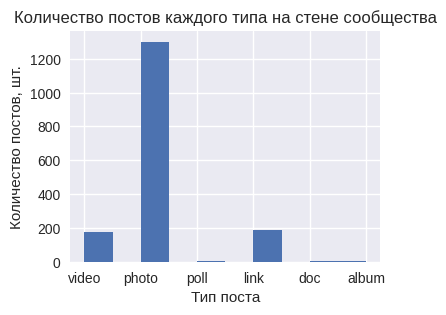

In [ ]:
# Псмотрим какие типы постов мы получили
fig, ax = plt.subplots(figsize=(4, 3))
plt.hist(posts_df['type'].dropna())
plt.ylabel('Количество постов, шт.')
plt.xlabel('Тип поста')
plt.title('Количество постов каждого типа на стене сообщества')
plt.show()

In [ ]:
posts_df['type'].value_counts()

photo    1301
link      189
video     173
poll        3
doc         3
album       3
Name: type, dtype: int64

#### Вывод:
- Преобладают посты типа photo (1301шт), так как картинка - один из самый быстрых способов передачи информации и превлечения внимания к возможному дополнительному содержанию.

#### **Проанализируем влияние месяца публикации постов на вовлеченность пользователей**

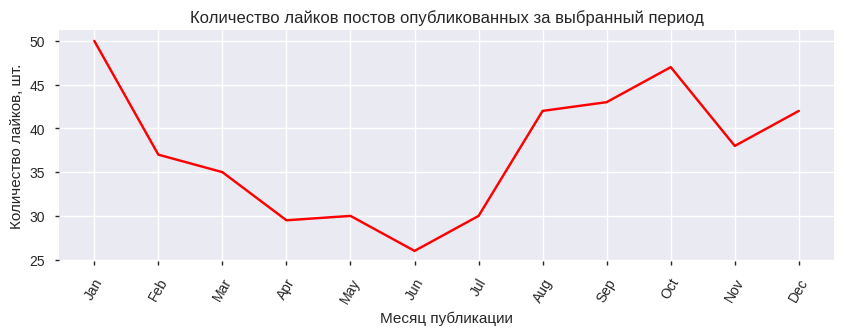

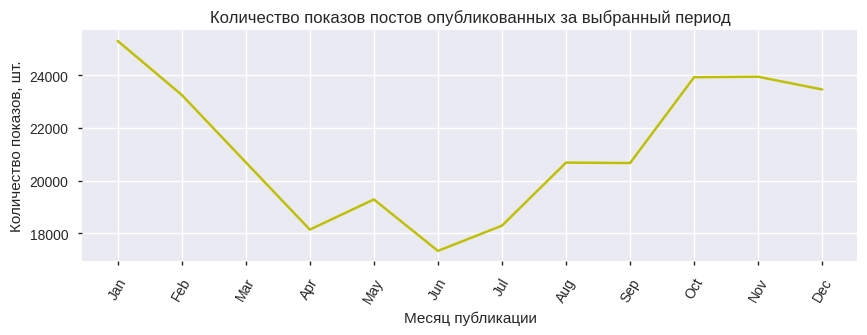

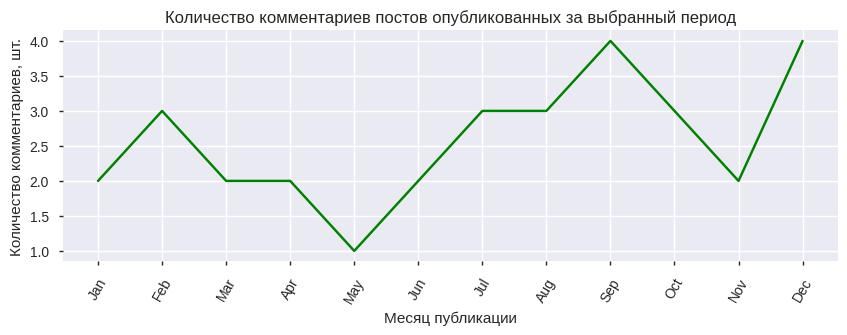

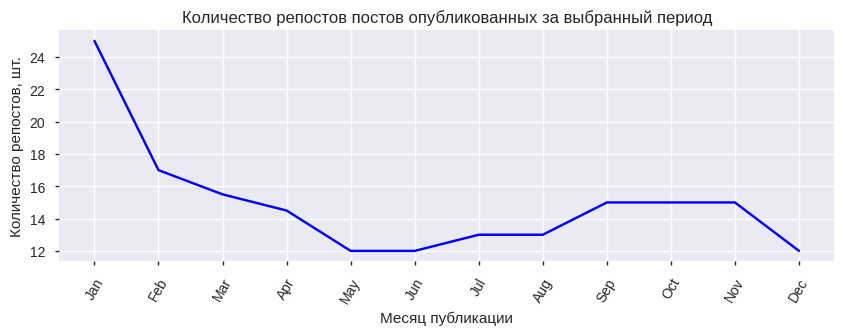

In [ ]:
# Создадм колонку месяцев
posts_df['month'] = posts_df['date'].dt.month.sort_values(ascending=True)
# словарь параметров метрик вовлеченности
params = {'likes.count':['r', 'лайков'], 'views.count':['y', 'показов'], 'comments.count':['g', 'комментариев'], 'reposts.count':['b', 'репостов']}
# функция визуализации зависимости метрик вовлеченности пользователей от месяца года
def visual_func(df, fit, name, c):
    # сгруппируем данные по месяцам и отберем медианное значение метрики вовлеченности
    posts = df.groupby(['month'])\
    .agg({fit: 'median'}).sort_values('month').reset_index()
    # переведем числовое представление месяца в текст
    posts['month'] = posts['month'].apply(lambda x: calendar.month_abbr[x])
    # инициализируем график(зададим размеры будущей визуализации)
    fig, ax = plt.subplots(figsize=(10, 3))
    plt.plot(posts['month'], posts[fit], color=c)
    ax.tick_params(width=1, length=3,  labelsize=10)
    plt.setp(ax.get_xticklabels(), rotation=60)
    plt.ylabel(f'Количество {name}, шт.')
    plt.xlabel('Месяц публикации')
    plt.title(f'Количество {name} постов опубликованных за выбранный период')
    plt.show()

# выведем графики зависимостей
for feature, param in params.items():
    visual_func(posts_df, feature, param[1], param[0])

#### Вывод:
- В январе есть активность пользователей, которая начинает снижаться вплоть до мая, после чего начинается рост активности с макимумами в осенний период, снижаясь к декабрю и вновь возрастая на высокие значения к январю.

##### Тексты постов с макимальными метриками вовлеченности пользователей

In [ ]:
# посты с наибольшим количество комментариев
comment_df = posts_df[['text', 'comments.count', 'type']].sort_values('comments.count', ascending=False)
comment_df.head(5)

,text,comments.count,type
330,"Как насчет того, чтобы увидеть Дмитрия Нагиева...",2714,photo
504,"Кому проходки на VK Fest?\n\nЗнаем, желающих м...",2247,photo
835,"Нет, это не шутка! Попробовать 34 курса и инте...",453,photo
430,"Сможете перевернуть календарь так, чтобы 4 сен...",442,photo
540,"Что-то в моду входит, а что-то — выходит. А же...",251,photo


In [ ]:
# посты с наибольшим количество лайков
likes_df = posts_df[['text', 'likes.count', 'type']].sort_values('likes.count', ascending=False)
likes_df.head(5)

,text,likes.count,type
835,"Нет, это не шутка! Попробовать 34 курса и инте...",1467,photo
507,"Мы в Skillbox верим, что каждый достоин второг...",1073,video
819,Хотите сделать жизнь от сессии до сессии немно...,920,photo
854,Что вас вдохновляет? Пишите в комментариях 👇🏻\...,706,link
1537,Как бы выглядели герои Disney в реальности?\n⠀...,651,photo


In [ ]:
# посты с наибольшим количество репостов
repost_df = posts_df[['text', 'reposts.count', 'type']].sort_values('reposts.count', ascending=False)
repost_df.head(5)

,text,reposts.count,type
835,"Нет, это не шутка! Попробовать 34 курса и инте...",2179,photo
819,Хотите сделать жизнь от сессии до сессии немно...,874,photo
968,"Нет, это не шутка! Попробовать 34 курса и инте...",818,photo
854,Что вас вдохновляет? Пишите в комментариях 👇🏻\...,653,link
885,"Нет, это не шутка! Попробовать 34 курса и инте...",621,photo


In [ ]:
# посты с наибольшим количество показов
view_df = posts_df[['text', 'views.count', 'type']].sort_values('views.count', ascending=False)
view_df.head(5)

,text,views.count,type
958,Есть разные способы узнать больше о Skillbox. ...,1075712,video
835,"Нет, это не шутка! Попробовать 34 курса и инте...",211249,photo
901,Научитесь создавать сценарии и постройте карье...,165982,link
1080,Топы тоже плачут: истории сильных людей о моме...,125289,video
507,"Мы в Skillbox верим, что каждый достоин второг...",123309,video


#### Вывод:
- По текстам самых популярных постов, заметны посты имеющие встроенный dead line (ограничение по времени). Например, один из самых популярных постов по всем метрикам активности это пост (ID: 832, 965, 882), в котором говорится о возможности использования учебных ресурсов, но с ограниченным временем. Этот пост выкладывался несколько раз, возможно из из своей популярности. Так же,  посты самым большим количеством лайков имеют ограничение по времени и плюс самый популярный пост предлагает встречу с известной личностью, а второй по популярности содержит некое подоби игры, так же с ограничением по количеству призов и времени.

#### **Аналитика по популярным словам**

In [ ]:
# Шаблон регулярного выражения(отберем названия рубрик идущих за значком #)

# функция для поиска текстов с рубриками
def text_search(df, reg='#\w+', sep=''):
    reg_expr = rf'{reg}'
    # компилируем регулярное выражение
    reg_expr_compiled = re.compile(reg_expr)
    # список рубрик
    word_list = []
    for text in df['text']:
        # применяем метод findall для поиска всех совпадений с щаблоном регулярного выражения в тексте
        if reg_expr_compiled.findall(text):
            word_list.append(sep.join(reg_expr_compiled.findall(text)))
    return word_list


# функция для поиска самых популярных слов в текстах
def word_search(df, reg='\w+', sep=','):
    words = {}
    for text in text_search(df, reg, sep):
        for word in text.split(','):
            if word in words:
                words[word] += 1
            else:
                words[word] = 1
    df = pd.DataFrame.from_dict(words, orient='index').reset_index().sort_values(0, ascending=False)
    df.columns = ['Слова', 'Количество']
    df = df[df['Слова'].apply(lambda x: len(x) > 3)].head(20)
    return df

In [ ]:
# посмотрим самые популярные слова в самых популярных постах
df_poular_words = view_df.head(100)
for text in [comment_df.head(100), likes_df.head(100), likes_df.head(100)]:
  df_poular_words = pd.concat([df_poular_words, text])
df_poular_words.groupby('text').sum().reset_index()
word_search(df_poular_words).head(10)

<ipython-input-318-4682febdb312>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_poular_words.groupby('text').sum().reset_index()


,Слова,Количество
103,https,162
616,комментариях,121
6,Skillbox,114
369,карточках,109
483,если,79
99,курс,75
454,чтобы,70
148,можно,58
357,есть,58
617,Skillbox_дизайн,53


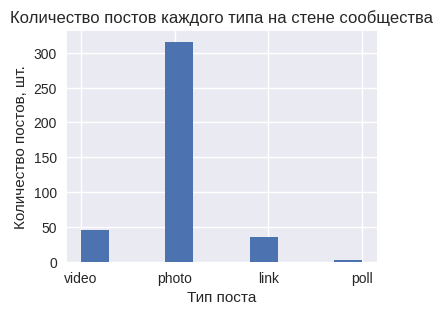

In [ ]:
# Посмотрим какие типы у самых популярных постов
fig, ax = plt.subplots(figsize=(4, 3))
plt.hist(df_poular_words['type'].dropna())
plt.ylabel('Количество постов, шт.')
plt.xlabel('Тип поста')
plt.title('Количество постов каждого типа на стене сообщества')
plt.show()

#### Вывод:
- В числе самых популярных слов имеются: *комментариях*(призывающий оставлять комментарии, в которых можно поделиться информацией), *карточках* (карточки с полезной информацией) и слово с призывом *Листайте* (этот призыв указывает наличие в посте карточек с интересной информацией). По типу поста, все так же лидирует тип 'photo'

#### **Анализ самой популярной рубрики**

In [ ]:
# создадим датафрейм с рубриками
df_heading = pd.DataFrame(text_search(posts_df), columns=['Рубрики'])
# отсортируем по убыванию и отберем самые популярные рубрики
df_heading['Рубрики'].value_counts(ascending=False).nlargest(5)

#Skillbox_дизайн              98
#Расписание_Skillbox          86
#Skillbox_программирование    45
#Skillbox_маркетинг           44
#Skillbox_киноимузыка         40
Name: Рубрики, dtype: int64

Самой популярной рубрикой является *#Skillbox_дизайн* (98 постов )

In [ ]:
# Теперь посмторим на рубрики самых популярных постов
df_heading = pd.DataFrame(text_search(df_poular_words), columns=['Рубрики'])
# отсортируем по убыванию и отберем самые популярные рубрики
df_heading['Рубрики'].value_counts(ascending=False).nlargest(5)

#В_Закладки_Skillbox                    16
#В_закладки_Skillbox#Skillbox_дизайн    11
#Skillbox_Дизайн                        10
#Skillbox_дизайн                        10
#Кейс_Skillbox#Skillbox_маркетинг        9
Name: Рубрики, dtype: int64

Среди самых популярных постов, самой популярной рубрикой является *#В_Закладки_Skillbox* (16 постов), *#Skillbox_дизайн* (10 постов)

In [ ]:
# Проанализируем текты постов с рубрикой #Skillbox_дизайн

# функция для отбора постов с рубрикой #Skillbox_дизайн
def is_word(text):
  if '#Skillbox_дизайн' in text:
    return text

# загрузим посты
df_design_posts = posts_df[posts_df['text'].isin(posts_df['text'].apply(lambda x: is_word(x)))]

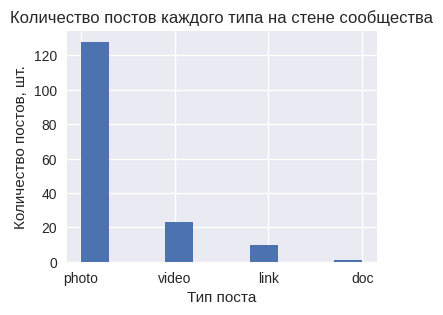

In [ ]:
# Визуализируем количество постов с рубрикой #Skillbox_дизайн каждого типа
fig, ax = plt.subplots(figsize=(4, 3))
plt.hist(df_design_posts['type'].dropna())
plt.ylabel('Количество постов, шт.')
plt.xlabel('Тип поста')
plt.title('Количество постов каждого типа на стене сообщества')
plt.show()

In [ ]:
df_design_posts['type'].value_counts()

photo    128
video     23
link      10
doc        1
Name: type, dtype: int64

- Так же, преобладают посты типа photo (128шт).

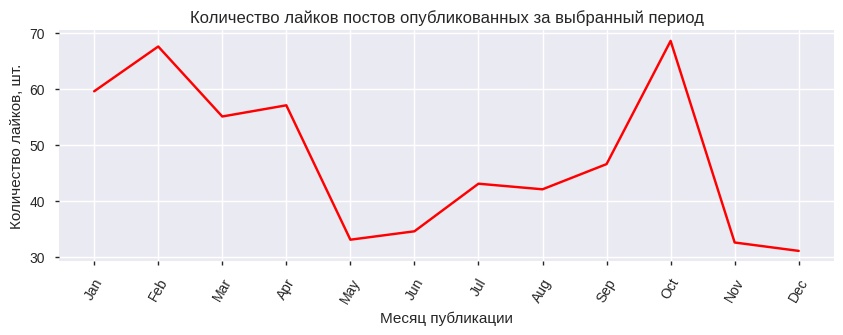

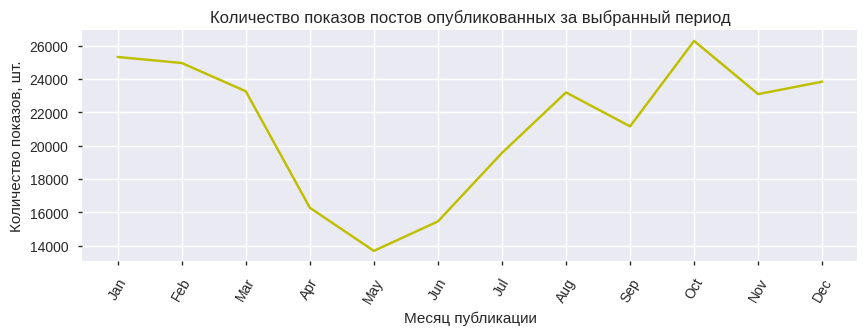

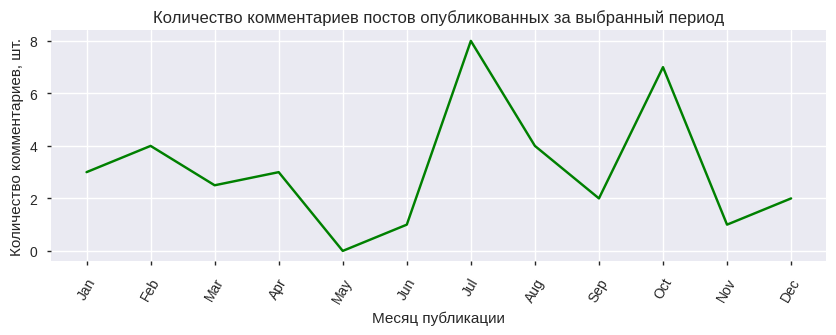

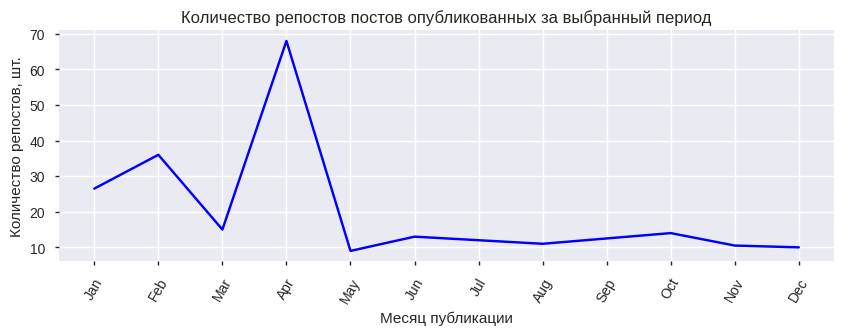

In [ ]:
# выведем графики зависимостей
for feature, param in params.items():
    visual_func(df_design_posts, feature, param[1], param[0])

#### Вывод:
- В апреле и после мая есть рост реакции пользователей на посты рубрики *#Skillbox_дизайн*, а в мае и ближе к зиме, идет снижение активности

In [ ]:
# Тексты постов опубликованных в периоды активности пользователей
high_activity_post = df_design_posts[df_design_posts['month'].isin([4, 7, 8, 10])]
high_activity_post['text'].head(5)

373    Задача: разработать дизайн карточки товара.\n\...
382    У вас всего три дня — успеете создать классный...
396    «И чему вас только в школе учат?»\n\nТакой воп...
438    Создавать иллюстрации к книгам — дело буквальн...
440    Слушать о реализованных кейсах — интересно. Но...
Name: text, dtype: object

In [ ]:
# Тексты постов опубликованных в периоды слабой активности пользователей
low_activity_post = df_design_posts[df_design_posts['month'].isin([5, 11, 12])]
low_activity_post['text'].head(5)

270    Пару недель назад мы восхищались работой Алены...
272    Как найти первого клиента, только начав курс? ...
276    Дед Мороз вот-вот постучится в дверь, а у вас ...
278    Как учеба?\n\nВместо ответа на этот вопрос пол...
282    В Figma много крутых эффектов, с которыми можн...
Name: text, dtype: object

#### Вывод:
- Среди популярных постов из рубрики *#Skillbox_дизайн*, так же присутствуют посты с интересными предложениями, которые  ограничены по времени

In [ ]:
# самые популярные слова в постах с наибольшей популярностью
word_search(high_activity_post).head(10)

,Слова,Количество
51,Skillbox_дизайн,52
188,https,33
44,карточках,23
2,дизайн,16
187,курс,13
113,Skillbox,12
141,работы,12
92,только,11
35,дизайнер,11
46,комментариях,11


In [ ]:
# самые популярные слова в постах с наименьшей популярностью
word_search(low_activity_post).head(10)

,Слова,Количество
45,Skillbox_дизайн,32
88,https,31
39,карточках,13
52,курс,11
23,дизайнер,9
307,работы,9
50,только,6
44,комментариях,6
10,Cofix,6
40,читайте,5


#### Вывод:
- Наборы самых популярных слов в постах из рубрики *#Skillbox_дизайн* в периоды активности и неактивности пользователей, примерно одинаковы. Слова в постак скорее всего мало влияют на активность, скорее всего важен именно период размешения постов

### **Выводы:**
- Период высокой активности происходит в начале января, после чего начинается спад до мая и затем снова начинается рост с макимумами в осенний период,снижаясь к декабрю и вновь возрастая на высокие значения к январю. В начале янвря и осенью, активность пользователей возрастает,а в мае и в последние месяцы года - падает.
- Посты с наличием интересного предложения с ограничением по времени - увеличивают метрики вовлеченности пользователей.
- Рекомендуется также использовать в постах карточки с интересной информацией и призывать пользователей делиться интересной информацией в комментариях.
- Рубрика #Skillbox_дизайн пользуется большой популярностью, ее следует поддерживать.
- Посты этой рубрики имеют пики активности в апреле и в период конца лета и осени и так же имеют спады в мае и последних месяцах года.
- Тип постов 'photo', самый популярный среди всех постов, а так же среди самых популярных